### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default style
sns.set_style(style='darkgrid')

import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
Data = pd.read_csv('data.csv')
Item = pd.read_csv('item.csv')
User = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [5]:
# Initial exploration of Data (Ratings)file 
print("Information by columns about Data")
print(Data.info())
print( )
print("Shape of the dataframe - Rows & Columns:",Data.shape)
#print(Data.shape)
print( )
print("Describe the dataframe:")
Data.describe()

Information by columns about Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

Shape of the dataframe - Rows & Columns: (100000, 4)

Describe the dataframe:


,user id,movie id,rating,timestamp
count,"100,000.00","100,000.00","100,000.00","100,000.00"
mean,462.48,425.53,3.53,"883,528,851.49"
std,266.61,330.80,1.13,"5,343,856.19"
min,1.00,1.00,1.00,"874,724,710.00"
25%,254.00,175.00,3.00,"879,448,709.50"
50%,447.00,322.00,4.00,"882,826,944.00"
75%,682.00,631.00,4.00,"888,259,984.00"
max,943.00,"1,682.00",5.00,"893,286,638.00"


In [6]:
# It appears that there are no null values, but to confitm:
Data.isnull().any()

user id      False
movie id     False
rating       False
timestamp    False
dtype: bool

In [7]:
# Initial review of Item (Movies) file 
print(Item.info())
Item.shape
print(Item.describe())
Item.isnull()
Item.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,SG
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3


In [6]:
# Initial review of User file 
print(User.info())
User.shape
print(User.describe())
User.isnull()
User.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
       user id    age
count   943.00 943.00
mean    472.00  34.05
std     272.36  12.19
min       1.00   7.00
25%     236.50  25.00
50%     472.00  31.00
75%     707.50  43.00
max     943.00  73.00


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 4. Find the number of movies per genre using the item data - 5 marks

In [8]:
# use sum on the default axis
SumItems=Item.sum()
print("Number of films by genere:")
SumItems

Number of films by genere:


movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [9]:
## Drama is the most frequent (popular?) genere

#### 5. Find the movies that have more than one genre - 2.5 marks

In [10]:
#hint: use sum on the axis = 1
#SumGeneres=Item[['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].sum(axis = 1)
#SumGeneres[SumGeneres>1]
Item2=Item
Item2["SG"]=Item2[['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].sum(axis = 1)
SG2=Item2[Item2["SG"]>1]
print("Movies that have more than one genere:", SG2["SG"].count())
SG2

Movies that have more than one genere: 849


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,SG
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,3
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [11]:
# First, I wanted to check how many movies have unknown genere
print("Initial shape:",Item.shape)
df1=Item[Item['unknown']==1]  #locating the record(s) with unknown genere
print(df1)
Item3=Item[Item['unknown']!=1]
print("Final shape:",Item3.shape)
print("The number of rows was decreased in 1 (we found just one record with 'unknown' genere)")
print("unknown genere movies:",Item3['unknown'].sum())

# Now, lets drop the unknown genere movie
Item.drop(Item[Item['unknown']==1]. index, axis=0, inplace=True)
# to verify it was droped:
print("unknown genere movies in Item dataframe:",Item['unknown'].sum())

Initial shape: (1681, 23)
      movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Film-Noir  Horror  Musical  \
1371          0          0       0      0  ...          0       0        0   

      Mystery  Romance  Sci-Fi  Thriller  War  Western  SG  
1371        0        0       0         0    0        0   1  

[1 rows x 23 columns]
Final shape: (1680, 23)
The number of rows was decreased in 1 (we found just one record with 'unknown' genere)
unknown genere movies: 0
unknown genere movies in Item dataframe: 0


In [12]:
#We can also check if unknown genere apears in Data
Data2=Data[Data["movie id"]!=1373]
Data2.shape

(99999, 4)

In [13]:
#  There is one row of unknown genere in Data (we could also drop it, but the merge will take it out)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [30]:
#a = 'My*cat*is*brown'
#print(a.split('*')[3])
#similarly, the release year needs to be taken out from release date
#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat
#print(a[10:])
#print(a[-5:])

This is the countplot of the ratings:
AxesSubplot(0.125,0.125;0.775x0.755)


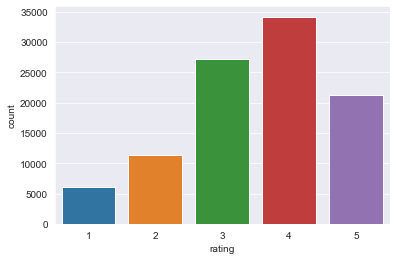

In [14]:
#your answers here

print("This is the countplot of the ratings:")
print(sns.countplot(Data["rating"]))

This is the distribution of Age:
AxesSubplot(0.125,0.125;0.775x0.755)


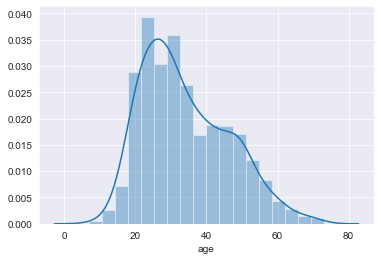

In [15]:
print("This is the distribution of Age:")
print(sns.distplot(User["age"]))

       0    1     2
0     01  Jan  1995
1     01  Jan  1995
2     01  Jan  1995
3     01  Jan  1995
4     01  Jan  1995
...   ..  ...   ...
1676  06  Feb  1998
1677  06  Feb  1998
1678  01  Jan  1998
1679  01  Jan  1994
1680  08  Mar  1996

[1680 rows x 3 columns]
Visualice the Release Year


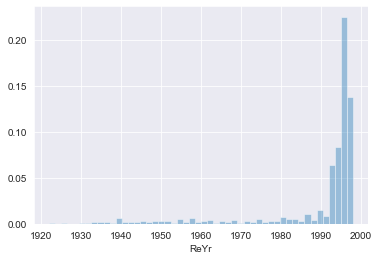

In [16]:
# Obtain the Release Year column:                     (I choosed distplot without KDE)
RY = (Item3["release date"].str.split("-",n=2, expand=True))
print (RY)
Item3["ReYr"]=RY[2]
# Plot the graph
print("Visualice the Release Year")
sns.distplot(Item3["ReYr"], kde=False, norm_hist=True);

In [17]:
## There are many more releases in the recent years 

This is the distribution of Gender:
AxesSubplot(0.125,0.125;0.775x0.755)


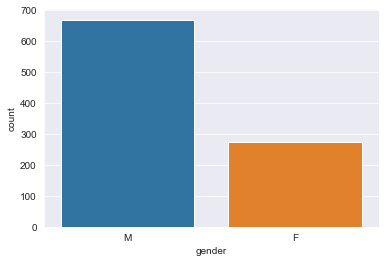

In [18]:
print("This is the distribution of Gender:")
print(sns.countplot(User["gender"]))

This is the distribution of Occupation:


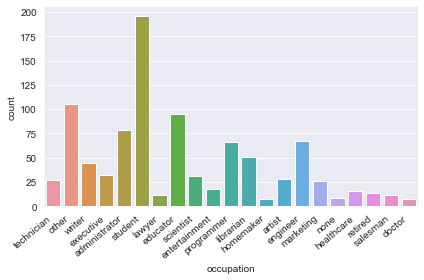

In [19]:
print("This is the distribution of Occupation:")
#print(sns.countplot(User["occupation"]))
ax=sns.countplot(x="occupation", data=User)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.rcParams["figure.figsize"] = (50, 10)
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

      Action  Adventure  Animation  Childrens  Comedy  Crime  Documentary  \
ReYr                                                                        
1922       0          0          0          0       0      0            0   
1926       0          0          0          0       0      0            0   
1930       0          0          0          0       0      0            0   
1931       0          0          0          0       0      1            0   
1932       0          0          0          0       0      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
1994      30         13          4         15      82      8            9   
1995      40         22          6         21      63     11            5   
1996      44         24          9         21     108     21           18   
1997      46         20          3         22      87     30            6   
1998      12          3          0          1      13      7            3   

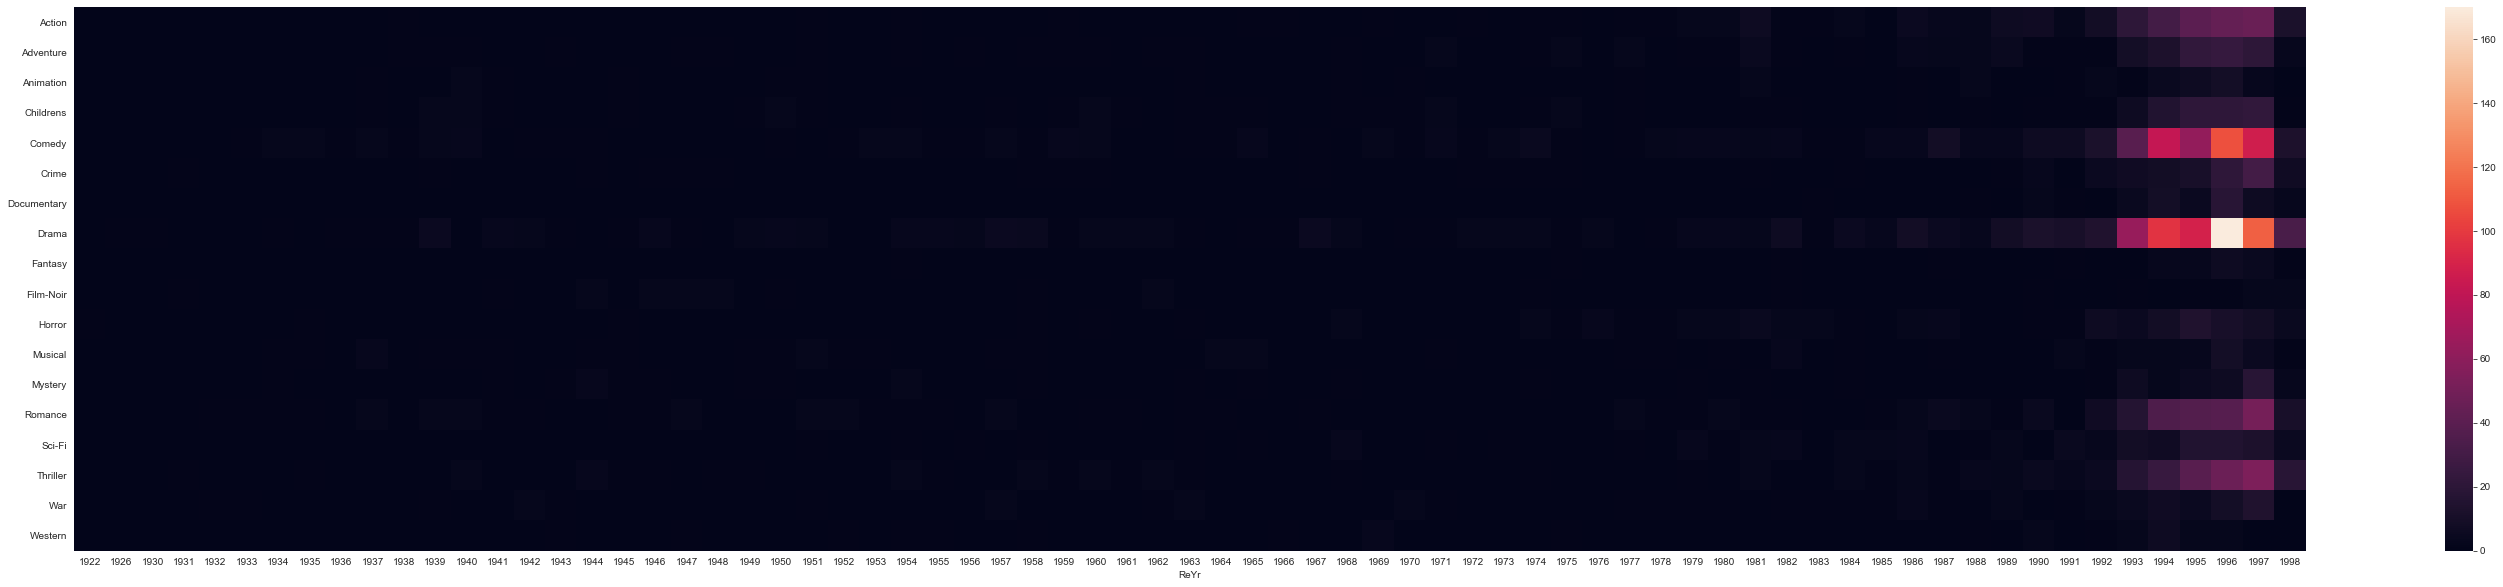

In [20]:
#Your answer here

#drop columns that we don't need
DD1= Item3.copy()
DD1.reset_index()
DD1.drop(['movie id','unknown','SG'],axis=1, inplace=True)
GrByYr=DD1.groupby(["ReYr"]).sum()
print(GrByYr)
#Transpose and plot:
TTs = GrByYr.transpose()
ax = sns.heatmap(TTs)

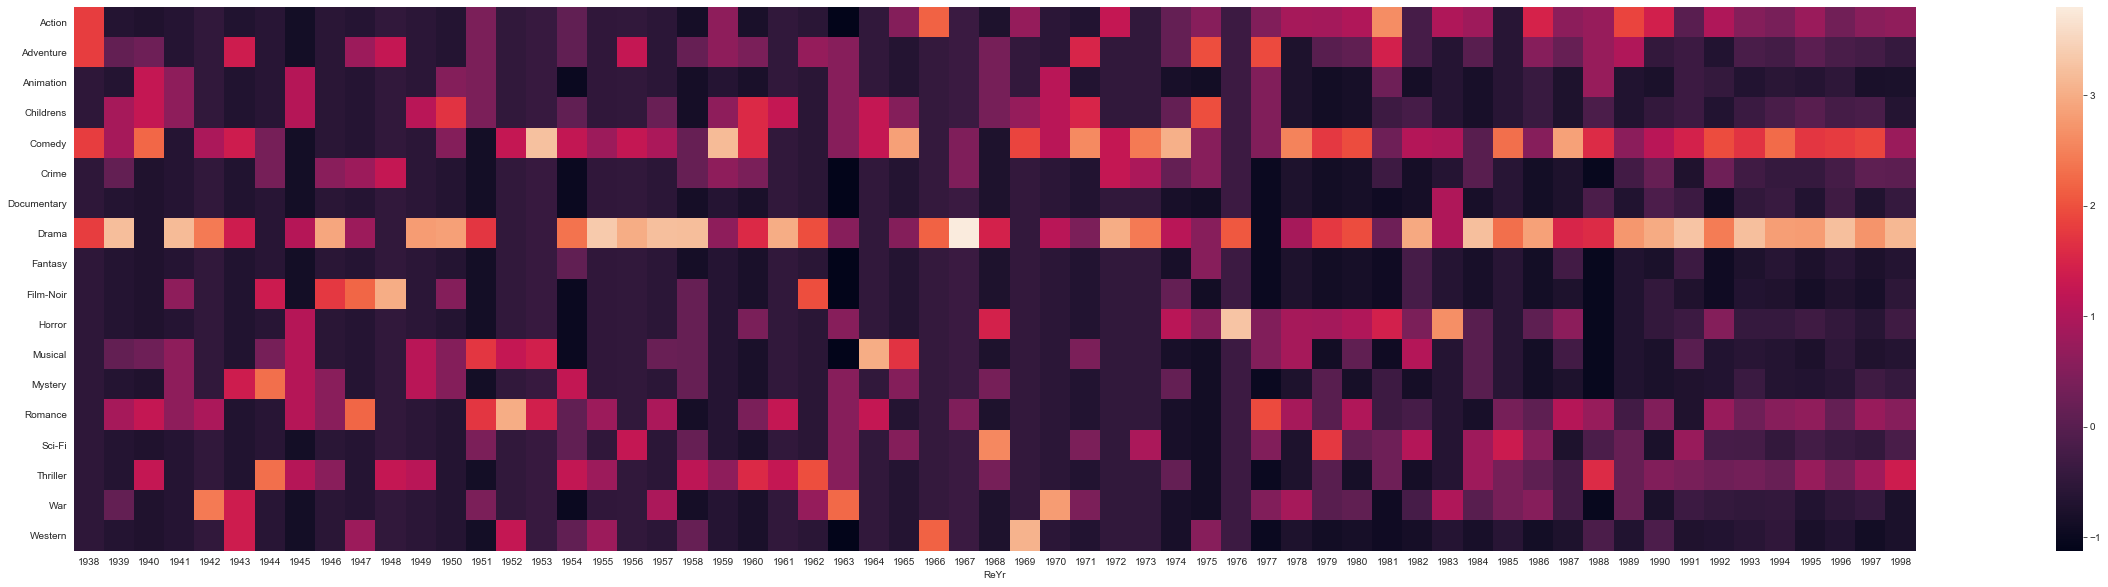

In [21]:
#most interesting data comes from the most recent years, here is a Normalized shorter version:

TT2=GrByYr.iloc[ 10: , : ]
TTs = TT2.transpose()
TTNorm=(TTs-TTs.mean())/TTs.std()
ax = sns.heatmap(TTNorm, square=True)

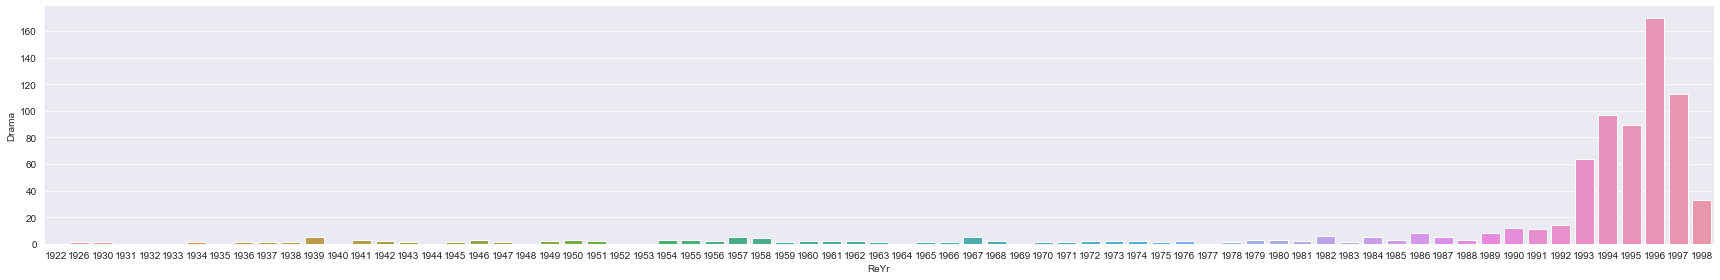

In [22]:
# From above, we confirm that the most poular genere is Drama, followed by Comedy, even in previous years

# To plot each Genere at a time:  (using Genere = Drama in this example)
DD2=GrByYr.reset_index()
sns.catplot(x="ReYr",
            y="Drama",
            hue=None,
            data=DD2,
            height=4, aspect=6,
           kind="bar"
           )

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [24]:
#your answer here

#first let's merge the tables
BigTT=pd.merge(Data,User,how='inner', on='user id')
BigT= pd.merge(BigTT,Item,how='inner',on='movie id')
CC1=BigT.groupby(["movie title"],as_index=False)["rating"].count()
Titles = CC1.loc[CC1["rating"] > 100 ,"movie title"]
#Titles = CC2['movie title'].tolist()
CC3=BigT.groupby(["movie title"],as_index=False)["rating"].mean()
CC3.reset_index()
CC4=CC3.sort_values('rating',ascending=False).reset_index()
CC5 = CC4[CC4["movie title"].isin(Titles)]
CC6 = CC5.sort_values('rating',ascending=False).reset_index()

top25movies=CC6.iloc[ :25 , : ]
print( " Top 25 movies:" )
top25movies[["movie title","rating"]]


 Top 25 movies:


,movie title,rating
0,"Close Shave, A",4.49
1,Schindler's List,4.47
2,"Wrong Trousers, The",4.47
3,Casablanca,4.46
4,"Shawshank Redemption, The",4.45
5,Rear Window,4.39
6,"Usual Suspects, The",4.39
7,Star Wars,4.36
8,12 Angry Men,4.34
9,Citizen Kane,4.29


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [25]:
BigT
HH1= BigT["gender"].value_counts()
print(HH1)
HH2= BigT[['gender','Drama','Sci-Fi','Romance']]
HH3= HH2.groupby(["gender"]).sum()
print(HH3)
HH4=HH3.div(HH1,axis='rows')
HH4

#DataFrame.div(self, other, axis='columns', level=None, fill_value=None)

M    74252
F    25738
Name: gender, dtype: int64
        Drama  Sci-Fi  Romance
gender                        
F       11008    2629     5858
M       28887   10101    13603


,Drama,Sci-Fi,Romance
F,0.43,0.10,0.23
M,0.39,0.14,0.18


In [29]:
###  Conclusions:

#    Men watch more drama than women      = False
#    Women watch more Sci-Fi than men     = False
#    Men watch more Romance than women    = False
